# Problem statement-1
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
#importing libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#reading the dataset
elon=pd.read_csv("Elon_musk.csv",encoding='cp1252')

# EDA

In [3]:
# displays the first few rows of the DataFrame
elon.head(7)

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."


In [4]:
# summary of the DataFrame
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


# Pre-processing
The code performs several pre-processing steps on the text data from the "Elon_musk.csv" file. It removes symbols and spaces, converts the text to lowercase, removes stopwords, performs stemming, and re-joins the processed text.

# Step 1 : Removing spaces and symbol

In [5]:
#remove all non-alphabetic characters (except spaces) 
elon.Text=elon.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [6]:
elon.Text

0                                      kunalb Im an alien
1       IDAACarmack Ray tracing on Cyberpunk with HDR ...
2                        joerogan Spotify Great interview
3                            gtera Doge is underestimated
4       teslacn Congratulations Tesla China for amazin...
                              ...                        
1994    flcnhvy True it sounds so surreal but the nega...
1995    PPathole Make sure to read ur terms amp condit...
1996                    TeslaGong PPathole Samwise Gamgee
1997               PPathole Altho Dumb and Dumber is UFUF
1998                              Progress update August 
Name: Text, Length: 1999, dtype: object

In [7]:
#to remove all non-alphabetic characters 
re.sub('[^a-zA-Z ]', "", "I am cool you know $$$$ ;")

'I am cool you know  '

# Inference
The provided code eliminates all non-alphabetic characters from a given string by using the re.sub() function from the Python re package. Any character that is not an uppercase or lowercase letter (a-z or A-Z) or a space is matched by the regular expression [a-zA-Z].

All matches of this pattern are effectively removed from the original string by the re.sub() method, which substitutes all matches with an empty string. In the example given, the output string is "I am cool you know $$$$" after the regular expression substitution has been used to replace the input string.


The conclusion drawn from the code is that it successfully eliminates all non-alphabetic characters, leaving the final string to include just alphabetic characters and spaces.


In [8]:
elon.head(7)

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazin...
5,6,Happy New Year of the Ox httpstcoWFKMYuoj
6,7,Frodo was the underdogeAll thought he would fa...


# Step - 2 : Make text to lower

In [9]:
#convert the text in each row of the Text column to lowercase
elon.Text=elon.Text.apply(lambda x: x.lower())

In [10]:
elon.head(7)

,Unnamed: 0,Text
0,1,kunalb im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,gtera doge is underestimated
4,5,teslacn congratulations tesla china for amazin...
5,6,happy new year of the ox httpstcowfkmyuoj
6,7,frodo was the underdogeall thought he would fa...


In [11]:
#reduces words to their base or root form
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#Downloading the stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Infernce
The NLTK library is being used to download the stopwords corpus, enabling you to access and use stopwords in your text-processing activities.


# Step 3:- Splitting the words from line

In [13]:
#splitting the text into a list of words
elon.Text=elon.Text.apply(lambda x: x.split())

In [14]:
elon.head(7)

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, ..."
5,6,"[happy, new, year, of, the, ox, httpstcowfkmyuoj]"
6,7,"[frodo, was, the, underdogeall, thought, he, w..."


# Step 4 :- Removing Stopwords

In [15]:
#removes stopwords from the text 
elon.Text=elon.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [16]:
elon.head(7)

,Unnamed: 0,Text
0,1,"[kunalb, im, alien]"
1,2,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, amazi..."
5,6,"[happy, new, year, ox, httpstcowfkmyuoj]"
6,7,"[frodo, underdogeall, thought, would, failhims..."


In [17]:
#list of common stopwords in the English language
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Inference
a list of words commonly used in text analysis activities that are frequently regarded as non-discriminatory or uninformative that should be avoided. Pronouns, articles, conjunctions, prepositions, and other frequently used words that lack a clear meaning on their own are examples of stopwords.During tasks like text classification, information retrieval, or natural language processing, these stopwords can be used to filter out certain words from text input, allowing the focus to be on terms that are more relevant and informative.


# Step 5:- Stemming

In [18]:
#Applies stemming
ps = PorterStemmer()  
elon.Text=elon.Text.apply(lambda x: [ps.stem(word) for word in x])

In [19]:
elon.Text.head(7)

0                                  [kunalb, im, alien]
1    [idaacarmack, ray, trace, cyberpunk, hdr, next...
2                [joerogan, spotifi, great, interview]
3                            [gtera, doge, underestim]
4    [teslacn, congratul, tesla, china, amaz, execu...
5             [happi, new, year, ox, httpstcowfkmyuoj]
6    [frodo, underdogeal, thought, would, failhimse...
Name: Text, dtype: object

# Step 6 :- Rejoining

In [20]:
#Concatenates the list of words
elon.Text=elon.Text.apply(lambda x: " ".join(x))

In [21]:
elon.Text

0                                         kunalb im alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal neg propaganda stil...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                       ppathol altho dumb dumber ufuf
1998                                progress updat august
Name: Text, Length: 1999, dtype: object

# Sentiment Analysis
2) Perform emotion mining

The code uses the TextBlob library to perform sentiment analysis on the processed text. It assigns a sentiment score to each text entry, indicating the polarity of the sentiment (positive, negative, or neutral).

In [22]:
pip install -U textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     --------------- ---------------------- 256.0/636.8 kB 7.9 MB/s eta 0:00:01
     -------------------------- ----------- 440.3/636.8 kB 5.5 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 5.0 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from textblob import TextBlob
elon['sentiment'] = elon['Text'].apply(lambda x:TextBlob(x).sentiment[0] )
elon[['Text','sentiment']].head(7)
# TextBlob(x).sentiment[1] = sentiment[1]= negative and positive [0], only positive=[1]

,Text,sentiment
0,kunalb im alien,-0.250000
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000
2,joerogan spotifi great interview,0.800000
3,gtera doge underestim,0.000000
4,teslacn congratul tesla china amaz execut last...,0.000000
5,happi new year ox httpstcowfkmyuoj,0.136364
6,frodo underdogeal thought would failhimself ht...,0.000000


In [24]:
#Calculates the sentiment
elon.sentiment

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.000000
          ...   
1994    0.186667
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

# Inference
The sentiment score for a specific item or observation is represented by each value in the pandas Series called "elon.sentiment object," which has 1999 entries. The sentiment scores range from -1.0 to 1.0, with a score of 0 denoting neutral sentiment. Negative numbers indicate negative sentiment, while positive values indicate good sentiment.
Using various statistical or data analysis approaches, you can further analyse this sentiment information. Each sentiment value correlates to a particular item or observation.


# Problem statement -2
1) Extract reviews of any product from ecommerce website like amazon

In [43]:
#Importing libraries
import requests
from bs4 import BeautifulSoup

# Scraping reviews using BeautifulSoup

The code uses the BeautifulSoup library and requests module to scrape reviews from an Amazon product page. It retrieves multiple pages of reviews by modifying the URL with different page numbers and stores the reviews in a list.

In [48]:
link="https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [49]:
review_list=[]
for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    for i in range(0,len(reviews)):
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Patanjali-Honey-1kg/product-reviews/B01C8QIBJ0/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [50]:
review_list

['Good',
 'Regular grocery',
 'Good',
 'It was the cheapest I could find Online.',
 'Been using it for over five years and its okay. Never found it freezing and any change in texture. Have used enough of brands and find this product comparatively cheaper.',
 'Using this product from last 5 years, no complaint, brand value and long using experience  gives confidence of no adulteration.',
 'Very good taste and quality',
 'I think Dabur honey is better than this',
 'Good Flavour and Value Product',
 "I don't know where from these honey producers are churning out honey in industrial quantity. I have tasted the village honey. This honey is certainly not like the original. It is being sold and purchased due to Patanjali brand name else it is not pure honey."]

In [51]:
#indicates the number of collected reviews
len(review_list)

10

# Inference
The review_list is 10 words long. This indicates that review_list has a total of 10 reviews or components.


In [52]:
df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
df

,Reviews
0,Good
1,Regular grocery
2,Good
3,It was the cheapest I could find Online.
4,Been using it for over five years and its okay. Never found it freezing and any change in texture. Have used enough of brands and find this product comparatively cheaper.
5,"Using this product from last 5 years, no complaint, brand value and long using experience gives confidence of no adulteration."
6,Very good taste and quality
7,I think Dabur honey is better than this
8,Good Flavour and Value Product
9,I don't know where from these honey producers are churning out honey in industrial quantity. I have tasted the village honey. This honey is certainly not like the original. It is being sold and purchased due to Patanjali brand name else it is not pure honey.


# Pre-processing

In [53]:
#displays the DataFrame 'df' with the specified maximum column width
df.Reviews=df.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [54]:
df.head()

,Reviews
0,Good
1,Regular grocery
2,Good
3,It was the cheapest I could find Online
4,Been using it for over five years and its okay Never found it freezing and any change in texture Have used enough of brands and find this product comparatively cheaper


# Step - 2 : Make text to lower

In [55]:
#Applies a lambda function to the 'Reviews' column
df.Reviews=df.Reviews.apply(lambda x: x.lower())

In [56]:
df.head()

,Reviews
0,good
1,regular grocery
2,good
3,it was the cheapest i could find online
4,been using it for over five years and its okay never found it freezing and any change in texture have used enough of brands and find this product comparatively cheaper


# import stopwords and stemmer

In [57]:
#importing libraries
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# splitting word from line

In [58]:
#Applies a lambda function to the 'Reviews' column 
df.Reviews=df.Reviews.apply(lambda x: x.split())

In [59]:
df.head()

,Reviews
0,[good]
1,"[regular, grocery]"
2,[good]
3,"[it, was, the, cheapest, i, could, find, online]"
4,"[been, using, it, for, over, five, years, and, its, okay, never, found, it, freezing, and, any, change, in, texture, have, used, enough, of, brands, and, find, this, product, comparatively, cheaper]"


# removing stop words

In [60]:
#df.Reviews=df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])
df.Reviews=df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [61]:
df.head()

,Reviews
0,[good]
1,"[regular, grocery]"
2,[good]
3,"[cheapest, could, find, online]"
4,"[using, five, years, okay, never, found, freezing, change, texture, used, enough, brands, find, product, comparatively, cheaper]"


# stemming

In [62]:
#Applies stemming using the PorterStemmer
ps = PorterStemmer()  
df.Reviews=df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [63]:
df.head()

,Reviews
0,[good]
1,"[regular, groceri]"
2,[good]
3,"[cheapest, could, find, onlin]"
4,"[use, five, year, okay, never, found, freez, chang, textur, use, enough, brand, find, product, compar, cheaper]"


# rejoining

In [64]:
#Concatenates the list of words in each element of the 'Reviews' column
df.Reviews=df.Reviews.apply(lambda x: " ".join(x))

In [65]:
df.head()

,Reviews
0,good
1,regular groceri
2,good
3,cheapest could find onlin
4,use five year okay never found freez chang textur use enough brand find product compar cheaper


# Sentiment Analysis

# vader

In [66]:
#Downloads the 'vader_lexicon' dataset 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


True

In [67]:
#Imports the 'SentimentIntensityAnalyzer' class from the 'nltk.sentiment' module
from nltk.sentiment import SentimentIntensityAnalyzer
si = SentimentIntensityAnalyzer()

In [68]:
#calculates the compound sentiment score 
def sentiment_score(text):
    score=si.polarity_scores(text)
    return score['compound']

In [69]:
#new column named 'sentiment_score' in the DataFrame 'df'
df['sentiment_score'] = df['Reviews'].apply(lambda x:sentiment_score(x))


In [70]:
pd.set_option('max_colwidth', 500)
df.head()

,Reviews,sentiment_score
0,good,0.4404
1,regular groceri,0.0000
2,good,0.4404
3,cheapest could find onlin,0.0000
4,use five year okay never found freez chang textur use enough brand find product compar cheaper,0.2263


In [71]:
def sentiment_category(score1):
    if(score1 > 0.4):
        return 'Positive'
    elif(score1 < .1):
        return 'Negative'
    else:
        return 'Neutral'

# Inference
Defines the'score1' parameter for the'sentiment_category' function. The function uses conditional statements to check the value of "score1" within it.

'score1' returns the string 'Positive' if it is higher than 0.4.
'score1' returns the string 'Negative' if it is less than 0.1.
Otherwise, it returns the string "Neutral" if none of the aforementioned conditions are true.
Sentiment scores are divided into three groups by this function: "Positive," "Negative," and "Neutral."


In [72]:
df['sentiment'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))
df

,Reviews,sentiment_score,sentiment
0,good,0.4404,Positive
1,regular groceri,0.0000,Negative
2,good,0.4404,Positive
3,cheapest could find onlin,0.0000,Negative
4,use five year okay never found freez chang textur use enough brand find product compar cheaper,0.2263,Neutral
5,use product last year complaint brand valu long use experi give confid adulter,-0.2960,Negative
6,good tast qualiti,0.4404,Positive
7,think dabur honey better,0.4404,Positive
8,good flavour valu product,0.4404,Positive
9,dont know honey produc churn honey industri quantiti tast villag honey honey certainli like origin sold purchas due patanjali brand name els pure honey,0.3612,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

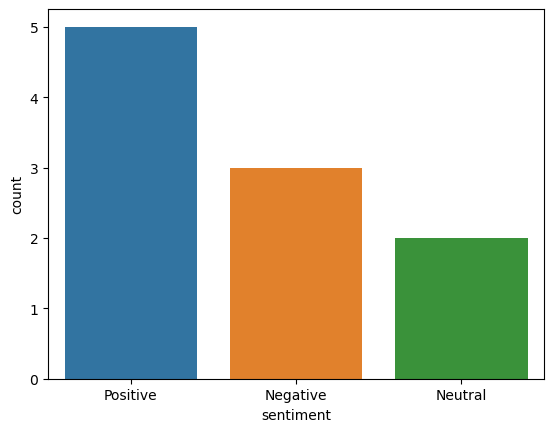

In [73]:
#showing the distribution of sentiment categories
sns.countplot(x=df['sentiment'])

# Inference:
From the above plot we can see that the positive sentiments are more followed by negative sentiments and than neutral